### Exercise 6.4 Supervised Machine Learning: Regression

#### Contents

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3a. Data prep for regression analysis, 1st Variable
#### 3b. Regression Analysis, 1st Variable
#### 4a. Data prep for regression analysis, 2nd Variable
#### 4b. Regression Analysis, 2nd Variable
#### 5a. Data prep for regression analysis, 3rd Variable
#### 5b. Regression Analysis, 3rd Variable

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Change settings to view max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Define path

path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Achievement 6\2. Data\Prepared Data'

In [5]:
#Import df
delay = pd.read_csv(os.path.join(path, 'delay seperated_csv.csv'), index_col = False)

In [6]:
# View head of data
delay.head()

,Column1,year,month,carrier,carrier_name,airport,city,state,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0,2020,12,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,PA,Lehigh Valley International,44,3,1.63,0.0,0.12,0.0,1.25,0,1,89,56,0,3,0,30
1,1,2020,12,9E,Endeavor Air Inc.,ABY,Albany,GA,Southwest Georgia Regional,90,1,0.96,0.0,0.04,0.0,0.00,0,0,23,22,0,1,0,0
2,2,2020,12,9E,Endeavor Air Inc.,AEX,Alexandria,LA,Alexandria International,88,8,5.75,0.0,1.60,0.0,0.65,0,1,338,265,0,45,0,28
3,3,2020,12,9E,Endeavor Air Inc.,AGS,Augusta,GA,Augusta Regional at Bush Field,184,9,4.17,0.0,1.83,0.0,3.00,0,0,508,192,0,92,0,224
4,4,2020,12,9E,Endeavor Air Inc.,ALB,Albany,NY,Albany International,76,11,4.78,0.0,5.22,0.0,1.00,1,0,692,398,0,178,0,116


In [7]:
# View shape of data
delay.shape

(3343, 24)

## 2. Data cleaning

In [8]:
# columns
delay.columns

Index(['Column1', 'year', 'month', 'carrier', 'carrier_name', 'airport',
       'city', 'state', 'airport_name', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [9]:
# Check for missing values

delay.isnull().sum()

Column1                0
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
city                   0
state                  0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [10]:
# Check for duplicates

dups = delay.duplicated()

In [11]:
dups.shape

(3343,)

No missing or duplicate values

C:\Users\ryanc\AppData\Local\Temp\ipykernel_13576\1117877928.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delay['carrier_ct'], bins=25)


<Axes: xlabel='carrier_ct', ylabel='Density'>

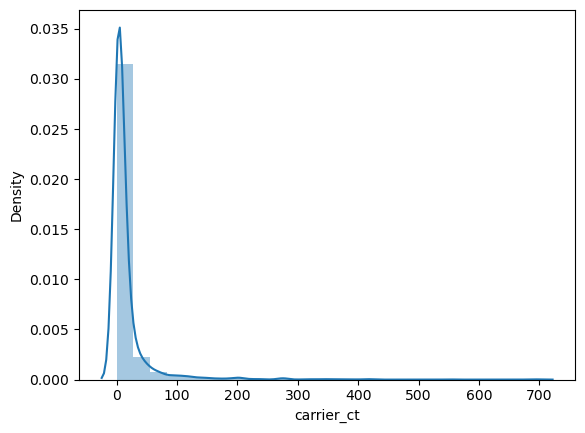

In [12]:
# Make a plot to check for extreme values

sns.distplot(delay['carrier_ct'], bins=25)

In [13]:
# Check mean

delay['carrier_ct'].mean()

16.06533652408017

In [14]:
# Check max

delay['carrier_ct'].max()

697.0

In [15]:
# Check std dev

delay['carrier_ct'].std()

41.759516480624065

## 3a. Data prep for regression analysis, 1st Variable


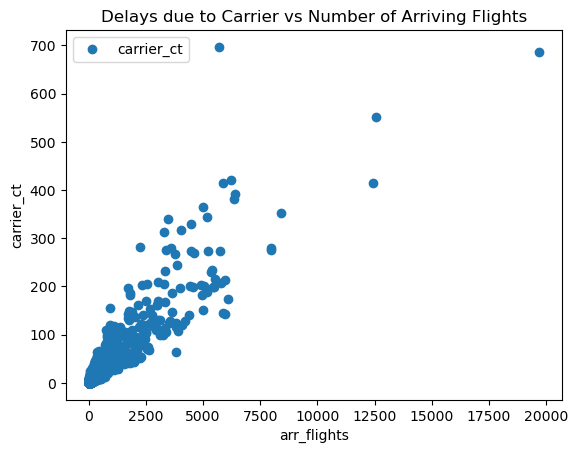

In [16]:
# Create a scatterplot using matplotlib for another look at how the 1st independant variable plots against arr_flights.

delay.plot(x = 'arr_flights', y='carrier_ct',style='o')
plt.title('Delays due to Carrier vs Number of Arriving Flights')  
plt.xlabel('arr_flights')  
plt.ylabel('carrier_ct')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = delay['arr_flights'].values.reshape(-1,1)
y = delay['carrier_ct'].values.reshape(-1,1)

In [18]:
X

array([[44],
       [90],
       [88],
       ...,
       [ 7],
       [12],
       [ 9]], dtype=int64)

In [19]:
y

array([[1.63],
       [0.96],
       [5.75],
       ...,
       [0.  ],
       [0.  ],
       [0.87]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3b. Regression Analysis, 1st Variable: "carrier_ct"

In [21]:
# Create a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

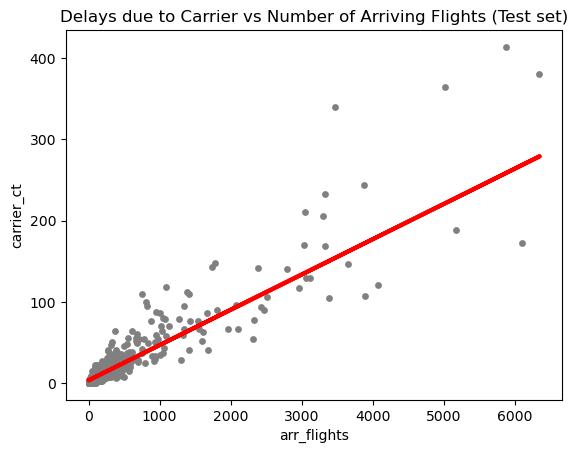

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Delays due to Carrier vs Number of Arriving Flights (Test set)')
plot_test.xlabel('arr_flights')
plot_test.ylabel('carrier_ct')
plt.savefig(os.path.join(path, 'LinReg1test.png'))
plot_test.show()

### Question 10: 
#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The model has dots more clustered around the line up to 1,000 arriving flights, after that they begin deviating heavily from the line of best fit. 

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04351739]]
Mean squared error:  214.3572625690822
R2 score:  0.829017695745835


In [27]:
y_predicted

array([[  3.79968823],
       [147.62466037],
       [  5.23576208],
       ...,
       [  6.67183593],
       [ 10.89302271],
       [  3.45154911]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.00,3.799688
1,232.58,147.624660
2,0.16,5.235762
3,4.63,9.848605
4,0.70,3.408032
5,1.80,6.019075
6,6.49,6.106110
7,6.79,8.673636
8,6.21,7.194045
9,6.00,5.714453


## Questions 11-13: 
##### Comparing model performance statistics, predicted Y values and model performance
For this model we got a Mean Squared Error of 214.357 and an R2 score of 0.829. This mean the model fits about 82.9% of the data, which is a relatively good fit but could be better. Our MSE of 214.357 is relatively large, given that our variable we're measuring, "carrier_ct" has a mean of 16.1. This is also shown in th graph of the test model where the larger the Y value the more the dots deviate from the line. Looking at the predicted Y values we see the same thing. Lower 'Actual' Y values are closer to the predicted values the lower they are. This model is only a good fit for small values of Y. 

##### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04351739]]
Mean squared error:  320.00246152103
R2 score:  0.8360997016741344


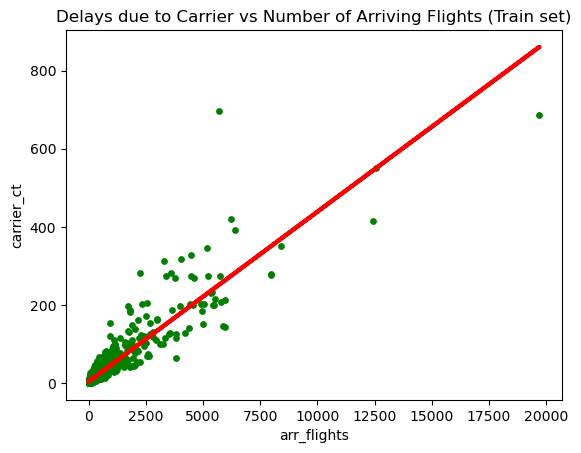

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Delays due to Carrier vs Number of Arriving Flights (Train set)')
plot_test.xlabel('arr_flights')
plot_test.ylabel('carrier_ct')
plt.savefig(os.path.join(path, 'LinReg1train.png'))
plot_test.show()

## 4a. Data prep for regression analysis, 2nd Variable: 'nas_ct"


In [33]:
# Check mean

delay['nas_ct'].mean()

16.183383188752618

In [34]:
# Check max

delay['nas_ct'].max()

1039.54

In [35]:
# Check std dev

delay['nas_ct'].std()

56.4230083390524

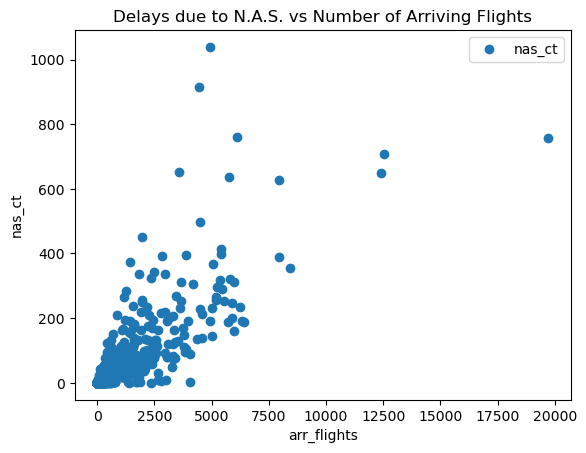

In [36]:
# Create a scatterplot using matplotlib for another look at how the 2nd independant variable plots against arr_flights.

delay.plot(x = 'arr_flights', y='nas_ct',style='o')
plt.title('Delays due to N.A.S. vs Number of Arriving Flights')  
plt.xlabel('arr_flights')  
plt.ylabel('nas_ct')  
plt.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = delay['arr_flights'].values.reshape(-1,1)
y = delay['nas_ct'].values.reshape(-1,1)

In [38]:
X

array([[44],
       [90],
       [88],
       ...,
       [ 7],
       [12],
       [ 9]], dtype=int64)

In [39]:
y

array([[0.12],
       [0.04],
       [1.6 ],
       ...,
       [0.52],
       [1.  ],
       [0.13]])

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4b. Regression Analysis, 2nd Variable

In [41]:
# Create a regression object.

regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

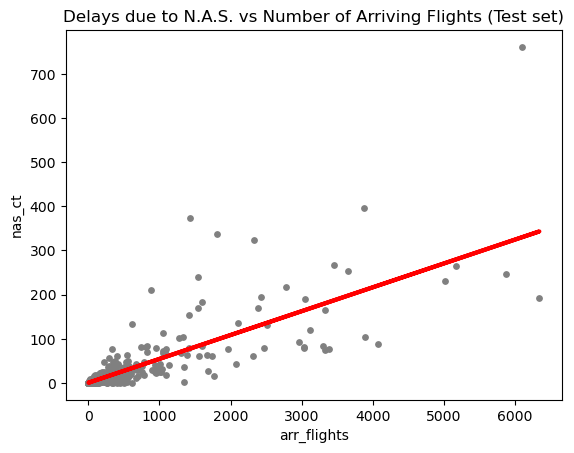

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Delays due to N.A.S. vs Number of Arriving Flights (Test set)')
plot_test.xlabel('arr_flights')
plot_test.ylabel('nas_ct')
plt.savefig(os.path.join(path, 'LinReg2test.png'))
plot_test.show()

### Question 10: 
#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The model has dots more clustered around the line at very low values of Y and after that they begin deviating heavily from the line of best fit. 

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05407036]]
Mean squared error:  710.609271214545
R2 score:  0.642581777991787


In [47]:
y_predicted

array([[  1.11641573],
       [179.81894989],
       [  2.90073755],
       ...,
       [  4.68505938],
       [  9.92988413],
       [  0.68385286]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.00,1.116416
1,73.74,179.818950
2,1.84,2.900738
3,10.44,8.632196
4,1.30,0.629783
5,3.20,3.874004
6,7.43,3.982145
7,2.52,7.172296
8,4.92,5.333904
9,0.00,3.495511


## Questions 11-13: 
##### Comparing model performance statistics, predicted Y values and model performance
For this model we got a Mean Squared Error of 710.609 and an R2 score of 0.64. This mean the model fits about 64% of the data and is a poor fit. Our MSE of 710.609 is quite large, given that our variable we're measuring, "nas_ct" has a mean of 16.1. This model performed worse than the previous variable of "carrier_ct" in all aspects. The data points deviate from the line of best fit even at low values of Y and this is seen on both the graph and when comparing the 'Actual' and 'Predicted' data set. Even under 1,000 arriving flights the data points skew heavily from the line of best fit.

##### Compare how the regression fits the training set


In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05407036]]
Mean squared error:  1172.4071209489364
R2 score:  0.6824935609745347


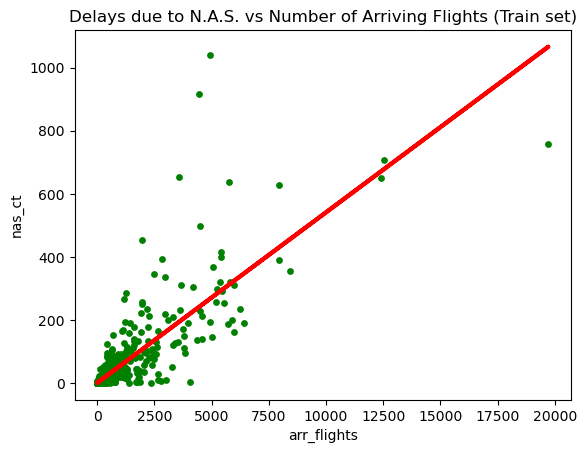

In [52]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Delays due to N.A.S. vs Number of Arriving Flights (Train set)')
plot_test.xlabel('arr_flights')
plot_test.ylabel('nas_ct')
plt.savefig(os.path.join(path, 'LinReg2train.png'))
plot_test.show()

## 5a. Data prep for regression analysis, 3rd Variable: 'late_aircraft_ct'


In [53]:
# Check mean

delay['late_aircraft_ct'].mean()

17.166069398743645

In [54]:
# Check max

delay['late_aircraft_ct'].max()

819.66

In [55]:
# Check std dev

delay['late_aircraft_ct'].std()

55.44704285465656

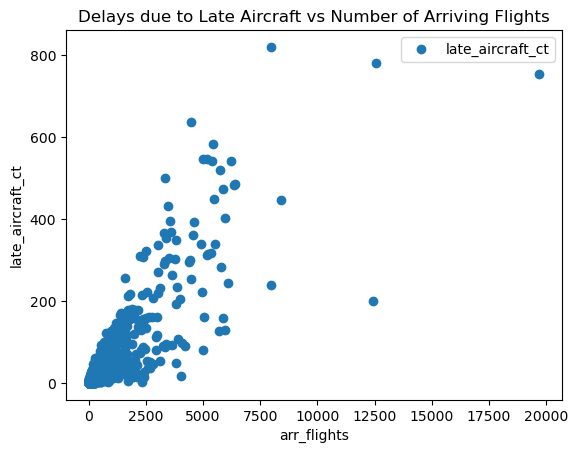

In [56]:
# Create a scatterplot using matplotlib for another look at how the 3rd independant variable plots against arr_flights.

delay.plot(x = 'arr_flights', y='late_aircraft_ct',style='o')
plt.title('Delays due to Late Aircraft vs Number of Arriving Flights')  
plt.xlabel('arr_flights')  
plt.ylabel('late_aircraft_ct')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = delay['arr_flights'].values.reshape(-1,1)
y = delay['late_aircraft_ct'].values.reshape(-1,1)

In [58]:
X

array([[44],
       [90],
       [88],
       ...,
       [ 7],
       [12],
       [ 9]], dtype=int64)

In [59]:
y

array([[1.25],
       [0.  ],
       [0.65],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
# Create a regression object.

regression = LinearRegression()

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

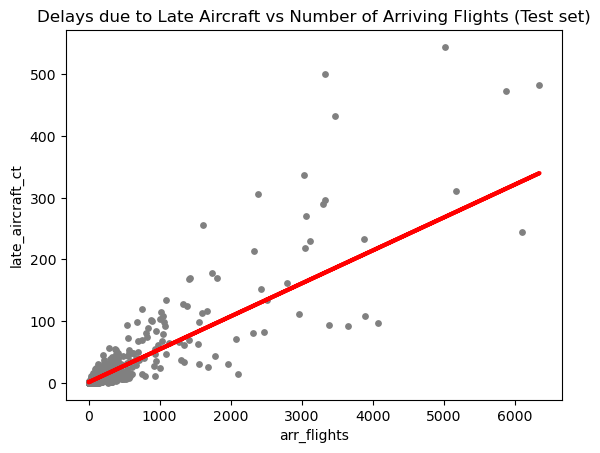

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Delays due to Late Aircraft vs Number of Arriving Flights (Test set)')
plot_test.xlabel('arr_flights')
plot_test.ylabel('late_aircraft_ct')
plt.savefig(os.path.join(path, 'LinReg3test.png'))
plot_test.show()

### Question 10: 
#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The model has data points more clustered around the line up to 1,000 arriving flights, after that they begin deviating heavily from the line of best fit. 

In [65]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [66]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0534628]]
Mean squared error:  644.6341339350674
R2 score:  0.7361143779895716


In [67]:
y_predicted

array([[  1.81519761],
       [178.50973535],
       [  3.57946985],
       ...,
       [  5.34374209],
       [ 10.52963321],
       [  1.38749525]])

In [68]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.00,1.815198
1,296.50,178.509735
2,4.00,3.579470
3,3.93,9.246526
4,0.00,1.334032
5,0.00,4.541800
6,1.33,4.648726
7,7.44,7.803031
8,4.73,5.985296
9,0.00,4.167561


## Questions 11-13: 
##### Comparing model performance statistics, predicted Y values and model performance
For this model we got a Mean Squared Error of 644.634 and an R2 score of 0.736. This mean the model fits about 73.6% of the data which is a better fit than the last varaible, 'nas_ct' but still not great. Our MSE of 644.634 is also quite large, given that our variable we're measuring, "late_aircraft_ct" has a mean of 17.2. This model performed slightly better than the previous variable of "nas_ct" but is still worse than the frist tested variable "carrier_ct". Similar to the last 2 models the data fit the line better at lower values of Y and begin to deviate quickly the larger the Y values get. This is again seen on both the graph and when comparing the 'Actual' and 'Predicted' data set. At around 1,000 arriving flights the data points skew heavily from the line of best fit.

##### Compare how the regression fits the training set


In [69]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [70]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [71]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0534628]]
Mean squared error:  879.5912794795646
R2 score:  0.7369181560366947


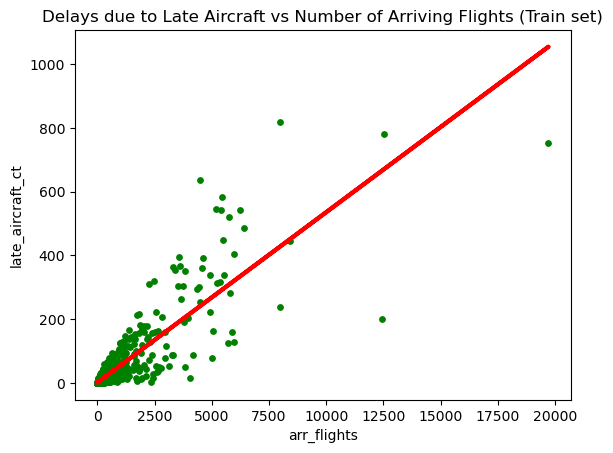

In [72]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Delays due to Late Aircraft vs Number of Arriving Flights (Train set)')
plot_test.xlabel('arr_flights')
plot_test.ylabel('late_aircraft_ct')
plt.savefig(os.path.join(path, 'LinReg3train.png'))
plot_test.show()